In [4]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from quantum_logical.channel import AmplitudeDamping, PhaseDamping
from quantum_logical.trotter import TrotterGroup
from quantum_logical.interaction import ConversionGainInteraction
from tqdm import tqdm
from quantum_logical.creating_operators import Creating_operators
from quantum_logical.operators import selective_destroy
from scipy.optimize import curve_fit

In [ ]:
# the code for trotterizing has been made more functional since it did not work for 1 qubit 

In [51]:
# generating parameters and creating initial state
T1 = 80
T2 = 8
N = 1
dim = 2
trotter_dt = .02
# psi0 = qt.tensor(qt.basis(dim, 1))
psi0 = qt.basis(dim, 1)
rho0 = psi0 * psi0.dag()
amp_damp_channel = AmplitudeDamping(T1, num_qubits=N, hilbert_space_dim=dim)
phase_damp_channel = PhaseDamping(T1, T2, num_qubits=N, hilbert_space_dim=dim)
trotter = TrotterGroup(
    continuous_operators=[amp_damp_channel, phase_damp_channel],
    trotter_dt=trotter_dt,
)


qt.Qobj(amp_damp_channel._create_single_qubit_operators(T1=1)[1])
rho0

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [52]:
dur = 1000
rho_delay = trotter.apply(state=rho0, duration=dur, discrete_unitary=qt.qeye(dim ** N))
rho_delay[-1]

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99996273e-01 0.00000000e+00]
 [0.00000000e+00 3.72665317e-06]]

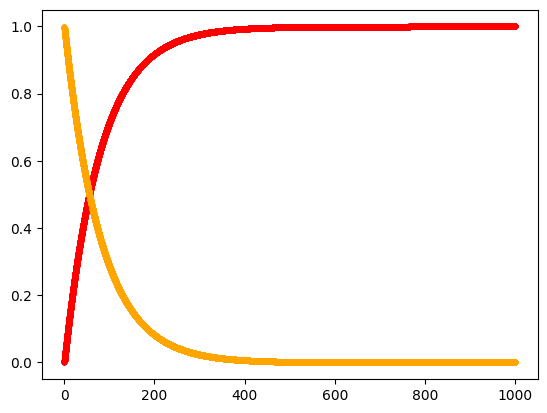

In [53]:
# data gathering for plot generation
g = []
e = []
values = []
for i in rho_delay:
    g.append(i[0, 0])
    e.append(i[1, 1])

time = np.linspace(0, dur, len(rho_delay))

fig, ax = plt.subplots()
ax.plot(time, g, marker = '.', color = "r")
ax.plot(time, e, marker = '.', color = "orange")

79.98160088238338

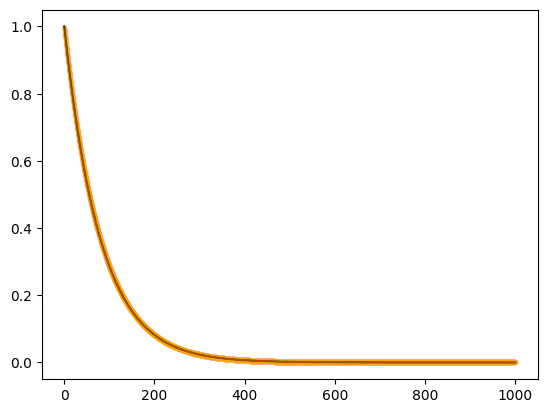

In [54]:
# decay from eg to gg best fit
def function_fit(t, b):
    return np.exp(-t / b)

parameters, covariance = curve_fit(function_fit, time, e)

# plotting best fit line and superimpose it on eg as a function of time 
fit_func = function_fit(time, parameters[0])
plt.plot(time, fit_func, color = "black", linestyle = "-")
plt.plot(time, e, color = "orange", marker = ".", alpha = 0.01)

parameters[0] 


In [41]:
# creating cz gate
CZ = np.zeros((dim ** N, dim ** N))
for i in range(dim ** N):
    for j in range(dim ** N):
        if i == 3 and j == 3:
            CZ[i, j] = -1
        elif i == j:
            CZ[i, j] = 1

CZ = qt.Qobj(CZ)

# creating the two ZZ gates 
z_matrix = qt.Qobj([[1, 0],[0, -1]])
z1z2 = qt.tensor(z_matrix, z_matrix,qt.qeye(dim))
z2z3 = qt.tensor(qt.qeye(dim), z_matrix, z_matrix)

# creating the cnot gates
def create_cnot(target_qubit, control_qubit, dim, num_qubits):
    N = num_qubits
    cnot = np.zeros((dim ** N, dim ** N))
    # separation_between_points = dim(N - target_qubit)
    for i in range(dim ** N):
        for j in range(dim ** N):
            if i == j:
                cnot[i,j] = 1
            
# cnot12 = [[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]
# qt.tensor(qt.Qobj(cnot12), qt.qeye(2))
# cnot13 = qt.Qobj([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
# cnot13


Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

# what are the components of the cx gate
# cnot, toffili(if 3 qubit setup is used instead of 5 which include two ancillas)
# how long does each of these take individually 
# normalize everything iswap time wise 

In [57]:
# durations
gate1_duration = 2
gate2_duration = 2
gate3_duration = 2
gate4_duration = 2
gate5_duration = 2
measurement_duration = 10
gate_durations = [gate1_duration,
gate2_duration,
gate3_duration,
gate4_duration,
gate5_duration,
measurement_duration]
# list of gates
gates = []
total_stab_duration = sum(gate_durations)


# how long does it take to complete one cycle of the stabilizer?
# divide the duration of the circuit above by the length of one stabilizer cycle and that is the amount of stabilizers you have to run

In [ ]:
# assuming all of the gates are made and the durations are set perfectly
# run the sim
cycles = dur / total_stab_duration
for _ in range(int(cycles)):
    for i in range(len(gate_durations)):
        rho0 = trotter.apply(rho0, duration=gate_durations[i], discrete_unitary=gates[i])
        rho0 = rho0[-1]

In [ ]:
# plot the state as a function of time
# data gathering for plot generation
gg = []
eg = []
values = []
for i in rho_delay:
    gg.append(i[0, 0])
    eg.append(i[16, 16])

time = np.linspace(0, dur, len(rho_delay))

fig, ax = plt.subplots()
ax.plot(time, gg, marker = '.', color = "r")
ax.plot(time, eg, marker = '.', color = "orange")

In [ ]:
parameters, covariance = curve_fit(function_fit, time, eg)

# plotting best fit line and superimpose it on eg as a function of time 
fit_func = function_fit(time, parameters[0])
plt.plot(time, fit_func, color = "black", linestyle = "-")
plt.plot(time, eg, color = "orange", marker = ".", alpha = 0.01)

parameters[0] 
